In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import networkx as nx

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rc('text', usetex = True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,xcolor}')

%matplotlib inline

# Figure 2

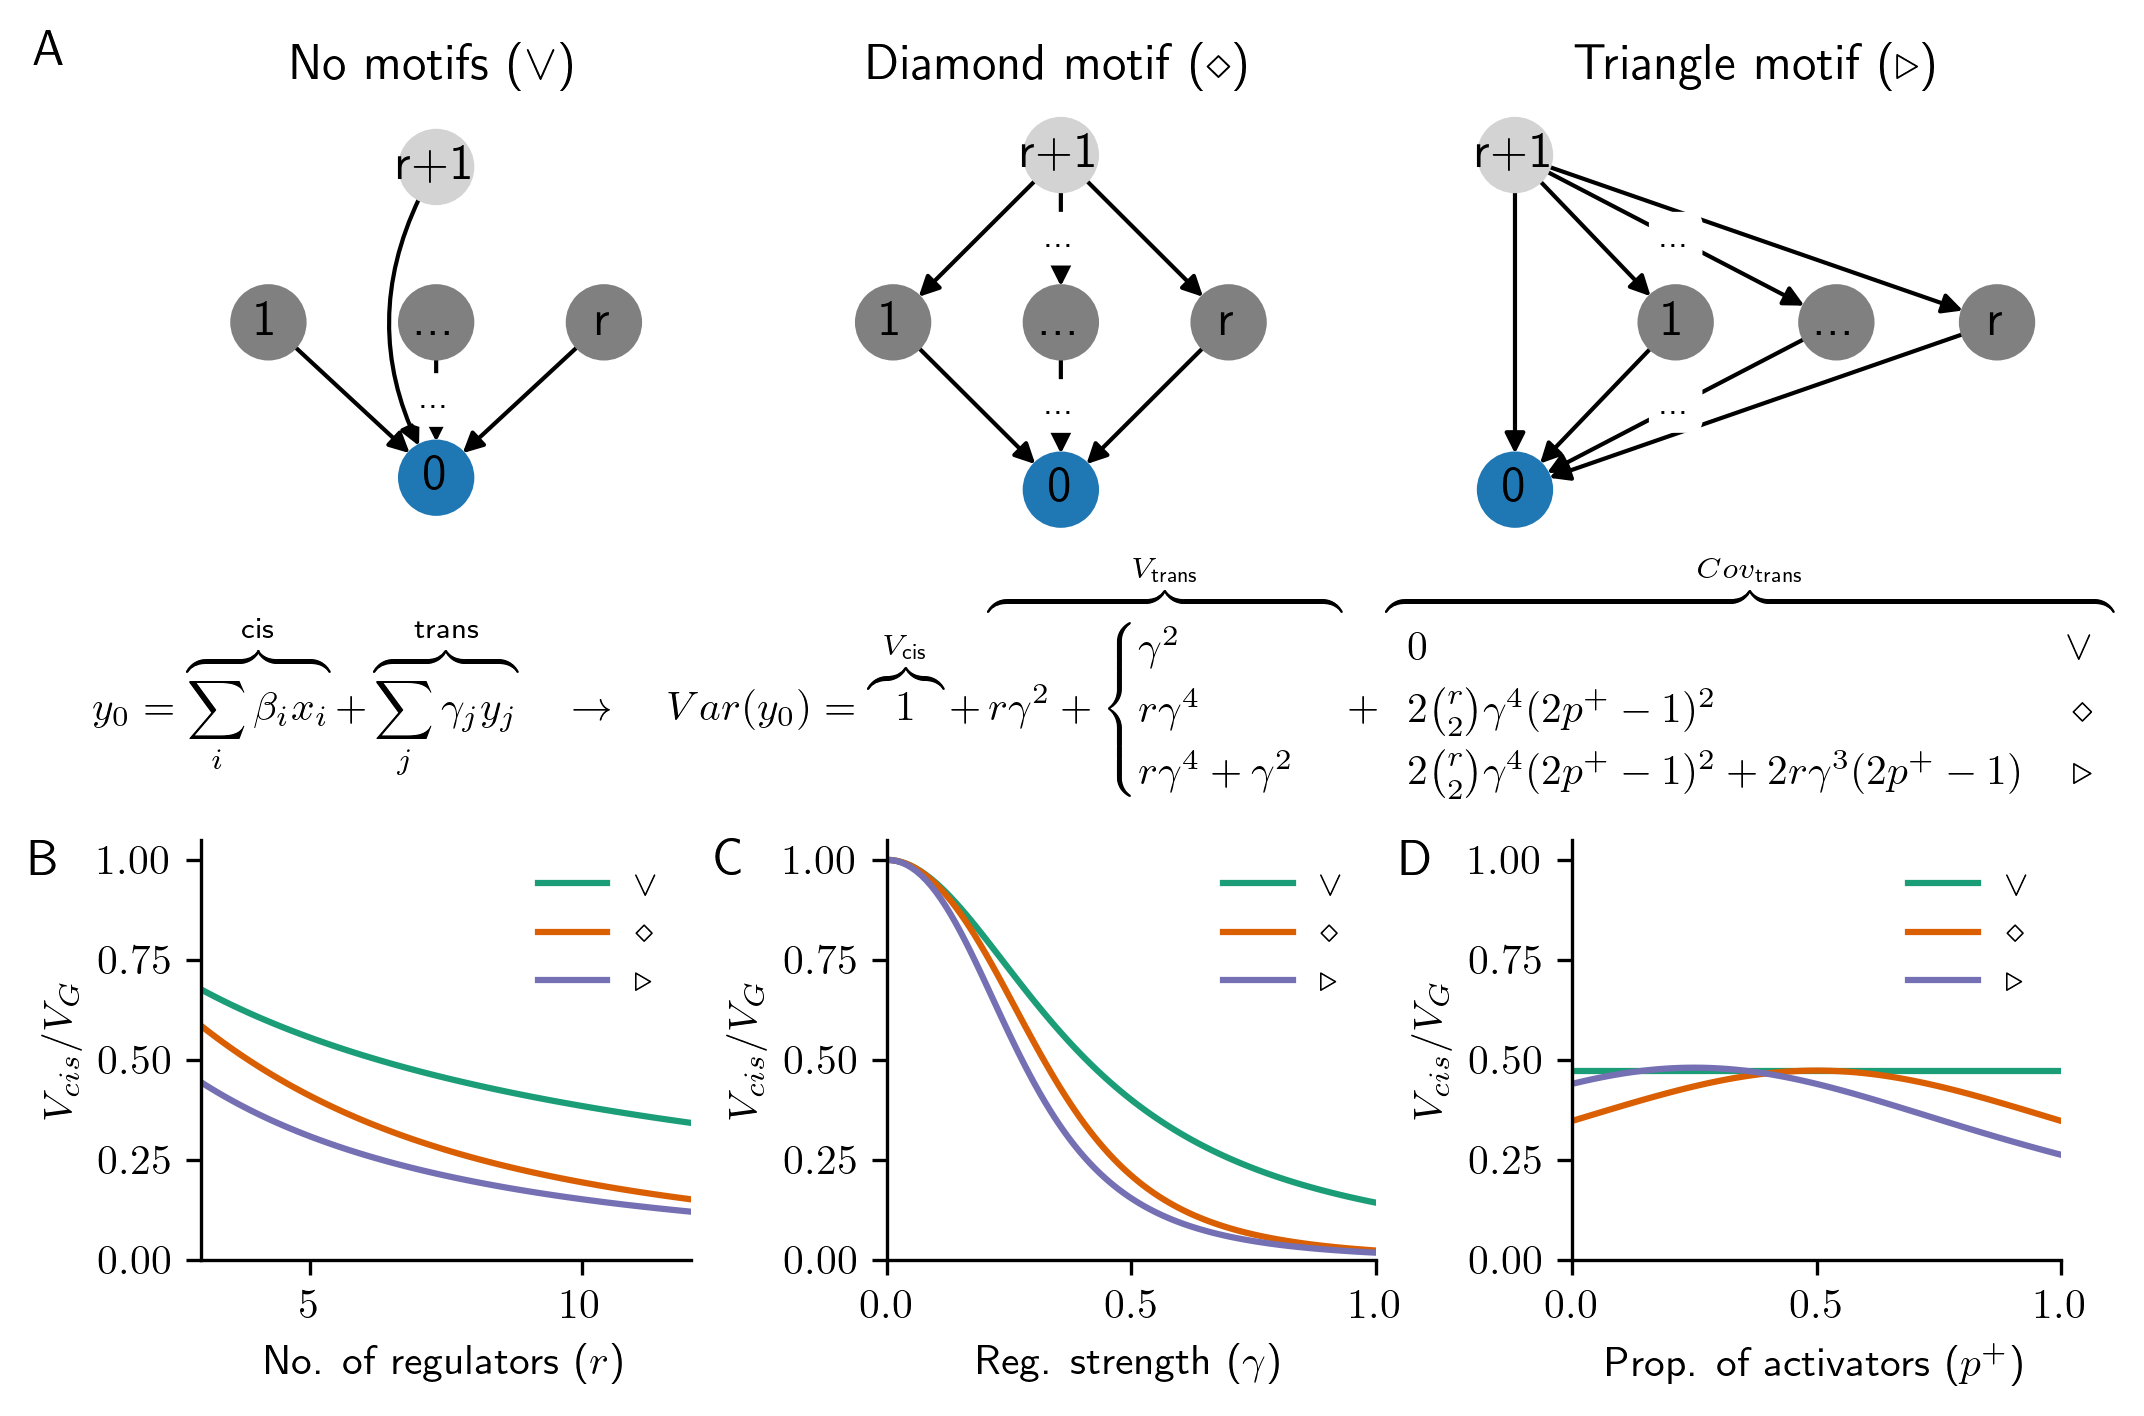

In [2]:
fig = plt.figure(figsize=(8, 5), dpi=300);

# Motif diagrams
gs1 = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[1, 1, 1.3], bottom=0.59, wspace=0.3)

gene_labels = True
gamma_labels = False


# V
ax = fig.add_subplot(gs1[0,0]) 

H=nx.from_edgelist([('1','0'), ('...','0'), ('r','0'), ('r+1','0')], create_using=nx.DiGraph())
pos={'0':[0,0], '1':[-0.5,1], '...':[0,1], 'r':[0.5,1], 'r+1':[0,2]}

nx.draw_networkx(
    H, 
    pos, 
    ax=ax,
    node_size=300, 
    node_color=['grey','tab:blue','grey','grey','lightgrey'], 
    with_labels=gene_labels, 
    edgelist = [e for e in H.edges() if 'r+1' not in e],
    width=1
);
#no='''
nx.draw_networkx_edges(
    H,
    pos,
    ax = ax,
    edgelist = [('r+1','0')],
    connectionstyle="arc3,rad=0.3",
    width = 1
)
#'''
if gamma_labels:
    nx.draw_networkx_edge_labels(
        H, 
        pos, 
        ax=ax, 
        edge_labels={
            ('1','0'):   r'$\gamma_{1}$', 
            ('...','0'):  '...',
            ('r','0'):   r'$\gamma_{r}$',
            ('r+1','0'):   r'$\gamma_{r+1}$'
        }, 
        font_size=8,
        rotate=0
    );
else:
    nx.draw_networkx_edge_labels(
        H, 
        pos, 
        ax=ax, 
        edge_labels={
            ('...','0')   :    '...'
        }, 
        font_size=8,
        rotate=0
    );

ax.set_xlim(-0.7, 0.7); 
ax.set_ylim(-0.4, 2.4);
ax.axis('off');
ax.set_title('No motifs ({})'.format(r'$\vee$'));


# Box
ax = fig.add_subplot(gs1[0,1])

H.remove_edges_from([('r+1','0')]);
H.add_edges_from([('r+1','1'), ('r+1','...'), ('r+1','r')])
pos={'0':[0,0], '1':[-0.5,1], '...':[0,1], 'r':[0.5,1], 'r+1':[0,2]}

nx.draw_networkx(
    H, 
    pos, 
    ax=ax, 
    node_size=300, 
    node_color=['grey','tab:blue','grey','grey','lightgrey'], 
    with_labels=gene_labels, 
    width=1
);

if gamma_labels:
    nx.draw_networkx_edge_labels(
        H, 
        pos, 
        ax=ax, 
        edge_labels={
            ('1','0'):   r'$\gamma_{1}$', 
            ('...','0'):  '...',
            ('r','0'):   r'$\gamma_{r}$',
            ('r+1','1')   :   r'$\gamma_{r+1}$', 
            ('r+1','...') :    '...',
            ('r+1','r')   :   r'$\gamma_{r+1}$',        
        }, 
        font_size=8,
        rotate=0
    );
else:
    nx.draw_networkx_edge_labels(
        H, 
        pos, 
        ax=ax, 
        edge_labels={
            ('...','0')   :    '...',
            ('r+1','...') :    '...'
        }, 
        font_size=8,
        rotate=0
    );

ax.set_xlim(-0.7, 0.7); 
ax.set_ylim(-0.3, 2.3);
ax.axis('off');
ax.set_title('Diamond motif ({})'.format(r'$\diamond$'));


# Triangle
ax = fig.add_subplot(gs1[0,2])

H.add_edges_from([('r+1','0')]);
pos={'0':[0,0], '1':[0.5,1], '...':[1,1], 'r':[1.5,1], 'r+1':[0,2]}

nx.draw_networkx(
    H, 
    pos, 
    ax=ax, 
    node_size=300, 
    node_color=['grey','tab:blue','grey','grey','lightgrey'], 
    with_labels=gene_labels, 
    width=1
);

if gamma_labels:
    nx.draw_networkx_edge_labels(
        H, 
        pos, 
        ax=ax, 
        edge_labels={
            ('1','0')     :   r'$\gamma_{1}$', 
            ('...','0')   :    '...',
            ('r','0')     :   r'$\gamma_{r}$',
            ('r+1','1')   :   r'$\gamma_{r+1}$',
            ('r+1','...') :    '...',
            ('r+1','r')   :   r'$\gamma_{r+1}$',
            ('r+1','0')   :   r'$\gamma_{r+1}$',
        }, 
        font_size=8,
        rotate=0
    );
else:
    nx.draw_networkx_edge_labels(
        H, 
        pos, 
        ax=ax, 
        edge_labels={
            ('...','0')   :    '...',
            ('r+1','...') :    '...',
        }, 
        font_size=8,
        rotate=0
    );

ax.set_xlim(-0.2, 1.7); 
ax.set_ylim(-0.3, 2.3);
ax.axis('off');
ax.set_title('Triangle motif ({})'.format(r'$\triangleright$'));



# Math
gs2 = fig.add_gridspec(nrows=1, ncols=3, top=0.39, wspace=0.4)

# Regulators per gene
ax = fig.add_subplot(gs2[0,0])
rs = np.linspace(3, 12, 90)
gamma = 0.4

for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                     np.cumsum([rs*(gamma**2), 
                                                (rs**2)*(gamma**4), 
                                                gamma**2 + (2*rs)*(gamma**3)], 
                                               axis=0))):
    c = plt.get_cmap('Dark2')(i)
    text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
    #name = text + ' ({})'.format(name)
    if i == 0:
        ax.plot(rs, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);
    else:
        ax.plot(rs, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);
        
ax.legend(fontsize='small', frameon=False, loc='upper right', bbox_to_anchor=[1, 1]);
ax.set_xlabel('No. of regulators ({})'.format(r'$r$'));
ax.set_xlim(rs[0], rs[-1]);
ax.set_ylabel(r'$V_{cis}/V_{G}$');
ax.set_ylim(0, 1.05);
ax.text(
    -0.35,
    1.0,
    'B',
    fontsize=12,
    ha = 'left',
    va = 'top',
    transform = ax.transAxes
);  


# Regulatory Strength
ax = fig.add_subplot(gs2[0,1])
gammas = np.linspace(0, 1.0, 100);
r = 6

for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                     np.cumsum([r*(gammas**2), 
                                                (r**2)*(gammas**4), 
                                                gammas**2 + (2*r)*(gammas**3)], 
                                               axis=0))):
    c = plt.get_cmap('Dark2')(i)
    text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
    #name = text + ' ({})'.format(name)
    if i == 0:
        ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);        
    else:
        ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);        
        
ax.legend(fontsize='small', frameon=False, loc='upper right', bbox_to_anchor=[1, 1]);
ax.set_xlabel('Reg. strength ({})'.format(r'$\gamma$'));
ax.set_ylabel(r'$V_{cis}/V_{G}$');
ax.set_xlim(gammas[0], gammas[-1]);
ax.set_ylim(0, 1.05);
ax.text(
    -0.35,
    1.0,
    'C',
    fontsize=12,
    ha = 'left',
    va = 'top',
    transform = ax.transAxes
);  


# Regulatory Composition
ax = fig.add_subplot(gs2[0,2])
p_ups = np.linspace(0, 1.0, 100);
r = 6
gamma = 0.4

for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                  np.cumsum([(r+1) * (gamma**2) * np.ones(p_ups.shape), 
                                             r*(gamma**4) * (1 + (r-1)*(((2*p_ups)-1)**2)) - (gamma**2), 
                                             (gamma**2) + (2 * r * (gamma**3) * ((2 * p_ups) - 1))], 
                                            axis=0))):
    c = plt.get_cmap('Dark2')(i)
    text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
    ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);              
        
ax.legend(fontsize='small', frameon=False, loc='upper right', bbox_to_anchor=[1, 1]);
ax.set_xlabel('Prop. of activators ({})'.format(r'$p^+$'));
ax.set_ylabel(r'$V_{cis}/V_{G}$');
ax.set_xlim(p_ups[0], p_ups[-1]);
ax.set_ylim(0, 1.05);
ax.text(
    -0.35,
    1.0,
    'D',
    fontsize=12,
    ha = 'left',
    va = 'top',
    transform = ax.transAxes
);  

fig.text(
    0.08, 
    0.47, 
    r'$y_0 = \overbrace{\sum_{i} \beta_i x_i}^{\text{cis}} ' + 
    r' + \overbrace{\sum_{j} \gamma_j y_j}^{\text{trans}} ' +
    r' \quad \rightarrow \quad ' + 
    r'Var(y_0) = \overbrace{1}^{V_{\text{cis}}} + \overbrace{r \gamma^2 ' + 
    r' + ' +          
    r'\begin{cases} ' + 
    r'\gamma^2 \\ ' + 
    r'r \gamma^4 \\ ' + 
    r'r \gamma^4 + \gamma^2' + 
    r'\end{cases}}^{V_{\text{trans}}}' +
    r' + \renewcommand{\arraystretch}{1.2} ' + 
    r'\overbrace{\begin{array}{lr} ' + 
    r'0 & \vee \\ ' + 
    r'2 {r \choose 2} \gamma^4 (2p^+ - 1)^2 & \diamond \\ ' + 
    r'2 {r \choose 2} \gamma^4 (2p^+ - 1)^2 + 2 r \gamma^3 (2p^+ - 1) & \triangleright ' + 
    r'\end{array}}^{Cov_{\text{trans}}}$'
);


fig.text(
    0.055,
    0.93,
    'A',
    ha = 'left',
    va = 'top',
    fontsize = 12
);

 

sns.despine();

plt.savefig('png/Figure2.png');

# Supplementary Figures

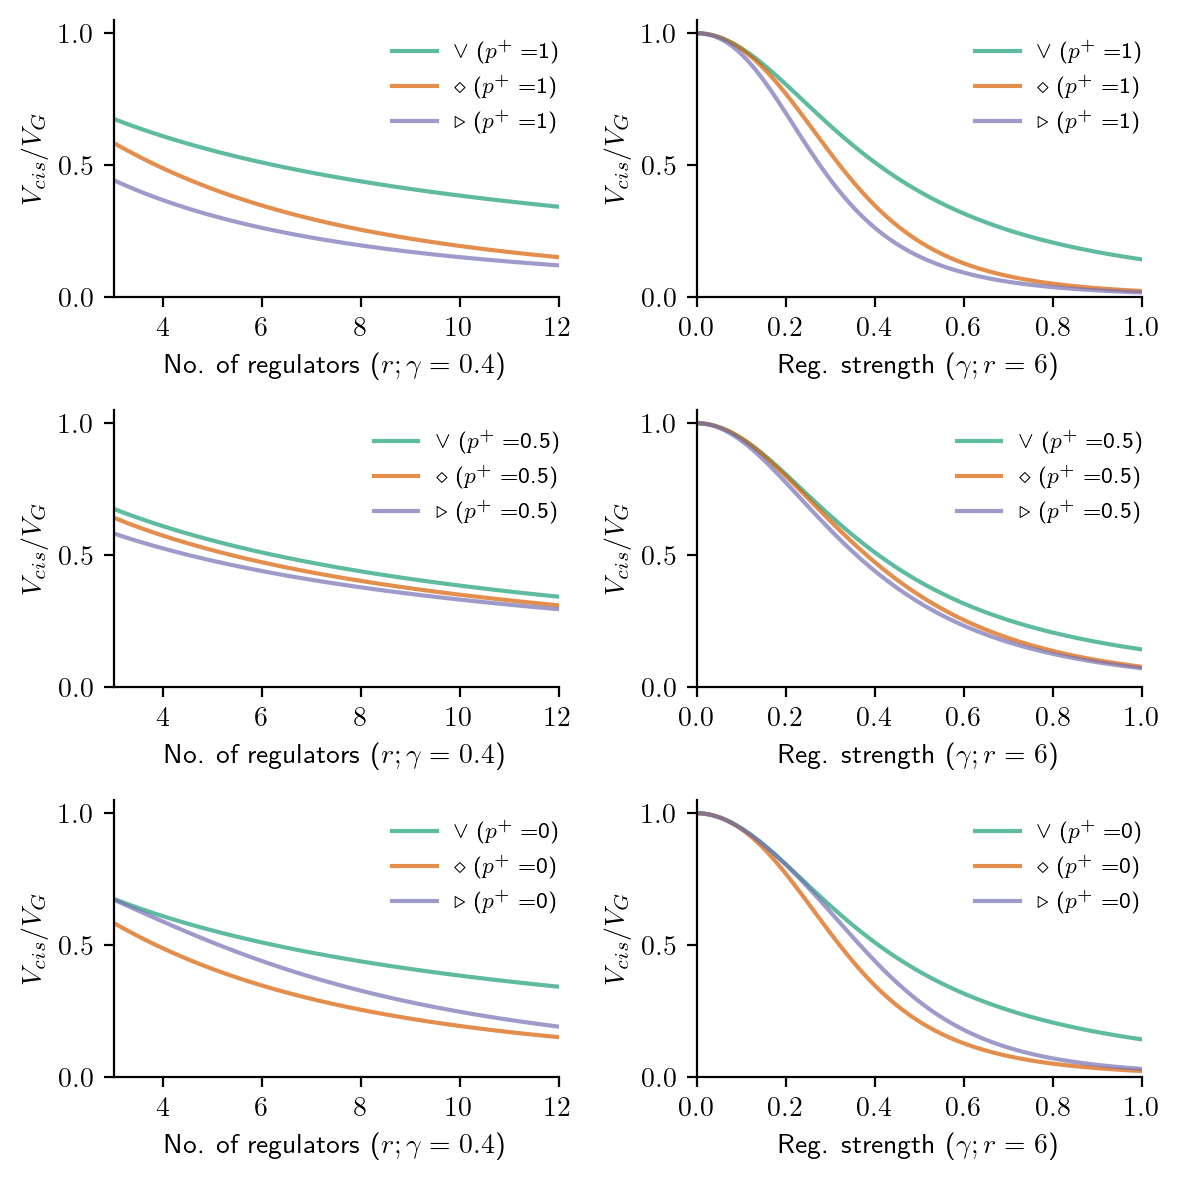

In [3]:
# Regulators per gene
fig, axs = plt.subplots(3, 2, figsize=(6, 6), dpi=200)

rs = np.linspace(3, 12, 90)
gamma = 0.4

for j,(p, _) in enumerate(zip([1, 0.5, 0], ['solid','dashed','dashdot'])):
    ax = axs[j,0]
    for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                         np.cumsum([rs*(gamma**2), 
                                                    rs*(gamma**4) + rs*(rs-1)*(gamma**4)*(((2*p)-1)**2),
                                                    gamma**2 + (2*rs)*(gamma**3)*((2*p)-1)],  
                                                   axis=0))):
        c = plt.get_cmap('Dark2')(i)
        text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
        ax.plot(rs, 1/(1 + df), color=c, marker=None, linestyle='solid', alpha=0.7, label = name+' ({0}{1})'.format(r'$p^+=$', p));
        
    ax.legend(fontsize=8, frameon=False, loc='upper right', bbox_to_anchor=[1.05, 1]);
    ax.set_xlabel('No. of regulators ({})'.format(r'$r; \gamma={}$'.format(gamma)));
    ax.set_xlim(rs[0], rs[-1]);
    ax.set_ylabel(r'$V_{cis}/V_{G}$');
    ax.set_ylim(0, 1.05);



# Regulatory Strength
gammas = np.linspace(0, 1.0, 100);
r = 6
for j,(p, _) in enumerate(zip([1, 0.5, 0], ['solid','dashed','dashdot'])):
    ax = axs[j,1]
    for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                         np.cumsum([r*(gammas**2), 
                                                    r*(gammas**4) + r*(r-1)*(gammas**4)*(((2*p)-1)**2),
                                                    gammas**2 + (2*r)*(gammas**3)*((2*p)-1)], 
                                                   axis=0))):
        c = plt.get_cmap('Dark2')(i)
        text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
        ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='solid', alpha=0.7, label = name+' ({0}{1})'.format(r'$p^+=$', p));       
        
    ax.legend(fontsize=8, frameon=False, loc='upper right', bbox_to_anchor=[1.05, 1]);
    ax.set_xlabel('Reg. strength ({})'.format(r'$\gamma; r={}$'.format(r)));
    ax.set_xlim(gammas[0], gammas[-1]);
    ax.set_ylabel(r'$V_{cis}/V_{G}$');
    ax.set_ylim(0, 1.05);

    
sns.despine();
fig.tight_layout();
plt.savefig('png/supplement/Fig_S2A.png');

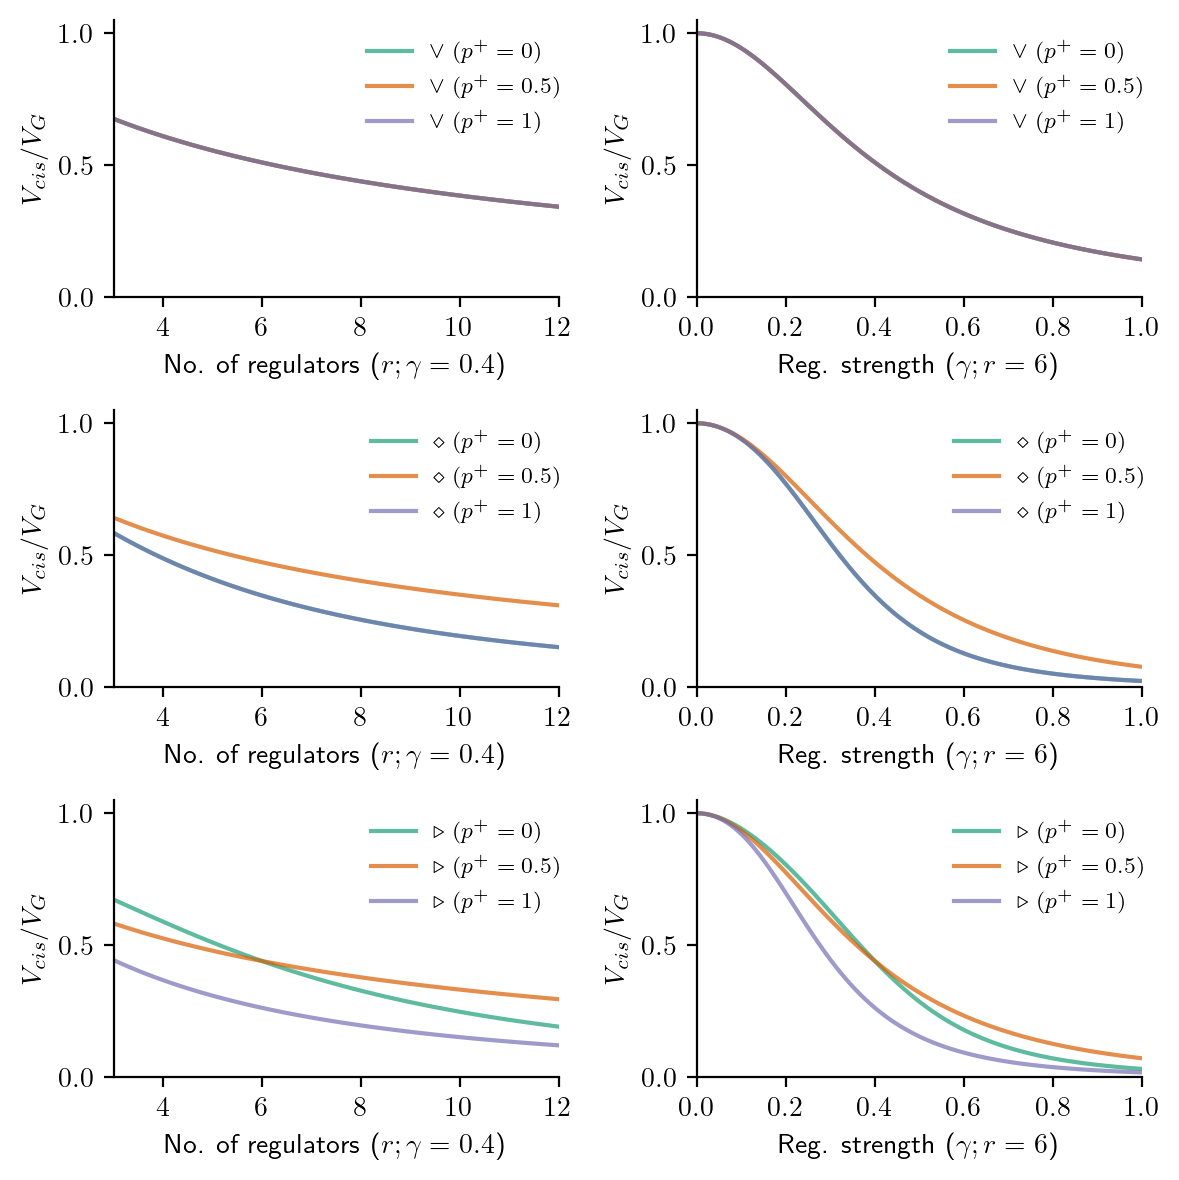

In [4]:
# Regulators per gene
fig, axs = plt.subplots(3, 2, figsize=(6, 6), dpi=200)

rs = np.linspace(3, 12, 90)
gamma = 0.4

for j,(p, style) in enumerate(zip([0, 0.5, 1], ['dotted','dashed','solid'])):
    for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                         np.cumsum([rs*(gamma**2), 
                                                    rs*(gamma**4) + rs*(rs-1)*(gamma**4)*(((2*p)-1)**2),
                                                    gamma**2 + (2*rs)*(gamma**3)*((2*p)-1)],  
                                                   axis=0))):
        ax = axs[i,0]
        c = plt.get_cmap('Dark2')(j)
        text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
        ax.plot(rs, 1/(1 + df), color=c, marker=None, linestyle='solid', alpha=0.7, label = name+' '+(r'$(p^+={})$'.format(p)));     
        
        if j == 2:
            ax.legend(fontsize=8, frameon=False, loc='upper right', bbox_to_anchor=[1.05, 1]);
            ax.set_xlabel('No. of regulators ({})'.format(r'$r; \gamma={}$'.format(gamma)));
            ax.set_xlim(rs[0], rs[-1]);
            ax.set_ylabel(r'$V_{cis}/V_{G}$');
            ax.set_ylim(0, 1.05);



# Regulatory Strength
gammas = np.linspace(0, 1.0, 100);
r = 6
for j,(p, style) in enumerate(zip([0, 0.5, 1], ['dotted','dashed','solid'])):
    for i, (name,df) in enumerate(zip([r'$\vee$', r'$\diamond$', r'$\triangleright$'],
                                         np.cumsum([r*(gammas**2), 
                                                    r*(gammas**4) + r*(r-1)*(gammas**4)*(((2*p)-1)**2),
                                                    gammas**2 + (2*r)*(gammas**3)*((2*p)-1)], 
                                                   axis=0))):
        ax = axs[i,1]
        c = plt.get_cmap('Dark2')(j)
        text = ['No motifs', 'Diamond motif', 'Triangle motif'][i]
        ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='solid', alpha=0.7, label = name+' '+(r'$(p^+={})$'.format(p)));       
        if j == 2:
            ax.legend(fontsize=8, frameon=False, loc='upper right', bbox_to_anchor=[1.05, 1]);
            ax.set_xlabel('Reg. strength ({})'.format(r'$\gamma; r={}$'.format(r)));
            ax.set_ylabel(r'$V_{cis}/V_{G}$');
            ax.set_xlim(gammas[0], gammas[-1]);
            ax.set_ylim(0, 1.05);

    
sns.despine();
fig.tight_layout();
plt.savefig('png/supplement/Fig_S2B.png');